# Iris Dataset with Support Vector Machine

In [3]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
len(iris.data)

150

In [13]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


###### If we have already existed column and on it if we want to create another column on existed column then we use apply(). We use lambda fuction for every value x

In [16]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [17]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [18]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

#### Here if we see the graphs we can understand that both data points are clearly seperated from eachother so we can apply SVM on them

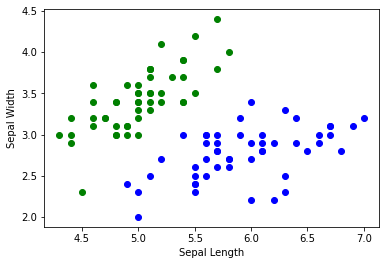

In [21]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color='green')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color='blue')

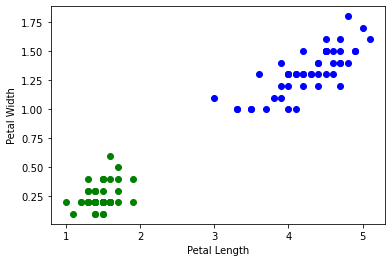

In [22]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color='green')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color='blue')

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x = df.drop(['target','flower_name'],axis='columns')
y = df.target

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [26]:
len(x_train)

120

In [28]:
len(x_test)

30

In [29]:
from sklearn.svm import SVC
model = SVC()

In [30]:
model.fit(x_train,y_train)

SVC()

In [31]:
model.score(x_train,y_train)

0.9666666666666667

In [33]:
x_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
28,5.2,3.4,1.4,0.2
54,6.5,2.8,4.6,1.5
110,6.5,3.2,5.1,2.0
41,4.5,2.3,1.3,0.3
19,5.1,3.8,1.5,0.3


In [35]:
model.predict([[5.2,3.4,1.4,0.2]])

array([0])

##### Here C is refereing the concept of Regularization. Higher value of C then higher regularization and vice versa  

In [38]:
model_c = SVC(C=10)
model_c.fit(x_train,y_train)
model_c.score(x_train,y_train)

0.9833333333333333

##### Now we will manipulate the value of gamma. Higher the value of gamma take margin from only near values and lower the value of gamma will take far margins from data points.

In [41]:
model_c = SVC(gamma=10)
model_c.fit(x_train,y_train)
model_c.score(x_train,y_train)

1.0

##### Now we do some manipulation of kernal too

In [43]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(x_train,y_train)
model_linear_kernal.score(x_train,y_train)

0.9833333333333333